In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [25]:
fandango = pd.read_csv('fandango_scrape.csv')
all_sites = pd.read_csv('all_sites_scores.csv')

In [26]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [27]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [8]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [10]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [164]:
combined = pd.merge(fandango, all_sites, on = 'FILM').sort_values(by = 'FILM').set_index('FILM')

combined = combined.rename(columns = {'STARS': 'Fandingo', 'RATING': 'Fandingo_User', 'VOTES': 'Fandingo_user_vote_count'})

combined = combined[['Fandingo', 'RottenTomatoes', 'Metacritic', 'IMDB', 
                     'Fandingo_User', 'RottenTomatoes_User', 'Metacritic_User', 
                     'Fandingo_user_vote_count', 'Metacritic_user_vote_count', 'IMDB_user_vote_count']]

combined['RottenTomatoes'] = np.round(combined['RottenTomatoes'] / 20, 1)
combined['Metacritic'] = np.round(combined['Metacritic'] / 20, 1)
combined['IMDB'] = np.round(combined['IMDB'] / 2, 1)
combined['RottenTomatoes_User'] = np.round(combined['RottenTomatoes_User'] / 20, 1)
combined['Metacritic_User'] = np.round(combined['Metacritic_User'] / 2, 1)

combined['FandingoDiff'] = combined['Fandingo'] - combined['Fandingo_User']
combined['RottenDiff'] = combined['RottenTomatoes'] - combined['RottenTomatoes_User']
combined['MetacriticDiff'] = combined['Metacritic'] - combined['Metacritic_User']

In [165]:
combined

,Fandingo,RottenTomatoes,Metacritic,IMDB,Fandingo_User,RottenTomatoes_User,Metacritic_User,Fandingo_user_vote_count,Metacritic_user_vote_count,IMDB_user_vote_count,FandingoDiff,RottenDiff,MetacriticDiff
FILM,,,,,,,,,,,,,
'71 (2015),3.5,4.8,4.2,3.6,3.5,4.1,3.8,192,60,24116,0.0,0.7,0.4
5 Flights Up (2015),4.0,2.6,2.8,3.0,3.6,2.4,3.4,79,6,2174,0.4,0.2,-0.6
A Little Chaos (2015),4.0,2.0,2.6,3.2,3.9,2.4,3.5,83,7,4778,0.1,-0.4,-0.9
A Most Violent Year (2014),3.5,4.5,4.0,3.6,3.4,3.4,3.5,675,133,32166,0.1,1.1,0.5
About Elly (2015),4.0,4.8,4.4,4.1,3.6,4.3,4.8,43,23,20659,0.4,0.5,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
What We Do in the Shadows (2015),4.5,4.8,3.8,3.8,4.3,4.3,4.2,259,69,39561,0.2,0.5,-0.4
When Marnie Was There (2015),4.5,4.4,3.6,3.9,4.1,4.4,3.2,46,29,4160,0.4,0.0,0.4
While We're Young (2015),3.0,4.2,3.8,3.2,2.9,2.6,3.4,449,65,17647,0.1,1.6,0.4


In [166]:
combined.isnull().values.any()

False

In [167]:
combined.describe()

,Fandingo,RottenTomatoes,Metacritic,IMDB,Fandingo_User,RottenTomatoes_User,Metacritic_User,Fandingo_user_vote_count,Metacritic_user_vote_count,IMDB_user_vote_count,FandingoDiff,RottenDiff,MetacriticDiff
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,4.086207,3.033103,2.942759,3.369655,3.841379,3.180690,3.253793,3817.696552,184.489655,42572.186207,0.244828,-0.147586,-0.311034
std,0.541169,1.509095,0.977365,0.477744,0.502437,0.996542,0.763128,6368.668671,317.361740,67558.506121,0.152721,0.959172,0.686488
min,3.000000,0.200000,0.600000,2.000000,2.700000,1.000000,1.200000,35.000000,4.000000,243.000000,0.000000,-3.300000,-2.500000
25%,3.500000,1.600000,2.200000,3.200000,3.500000,2.500000,2.800000,218.000000,33.000000,5626.000000,0.100000,-0.700000,-0.800000
50%,4.000000,3.200000,3.000000,3.400000,3.900000,3.300000,3.400000,1430.000000,72.000000,18986.000000,0.200000,0.000000,-0.300000
75%,4.500000,4.400000,3.800000,3.700000,4.200000,4.000000,3.800000,4279.000000,167.000000,44711.000000,0.400000,0.500000,0.200000
max,5.000000,5.000000,4.700000,4.300000,4.800000,4.700000,4.800000,34846.000000,2375.000000,334164.000000,0.500000,2.100000,1.400000


In [168]:
combined.mean()

Fandingo                          4.086207
RottenTomatoes                    3.033103
Metacritic                        2.942759
IMDB                              3.369655
Fandingo_User                     3.841379
RottenTomatoes_User               3.180690
Metacritic_User                   3.253793
Fandingo_user_vote_count       3817.696552
Metacritic_user_vote_count      184.489655
IMDB_user_vote_count          42572.186207
FandingoDiff                      0.244828
RottenDiff                       -0.147586
MetacriticDiff                   -0.311034
dtype: float64

In [254]:
scores = combined[['Fandingo', 'Fandingo_User','RottenTomatoes', 'RottenTomatoes_User',
                   'Metacritic', 'Metacritic_User', 'IMDB']]

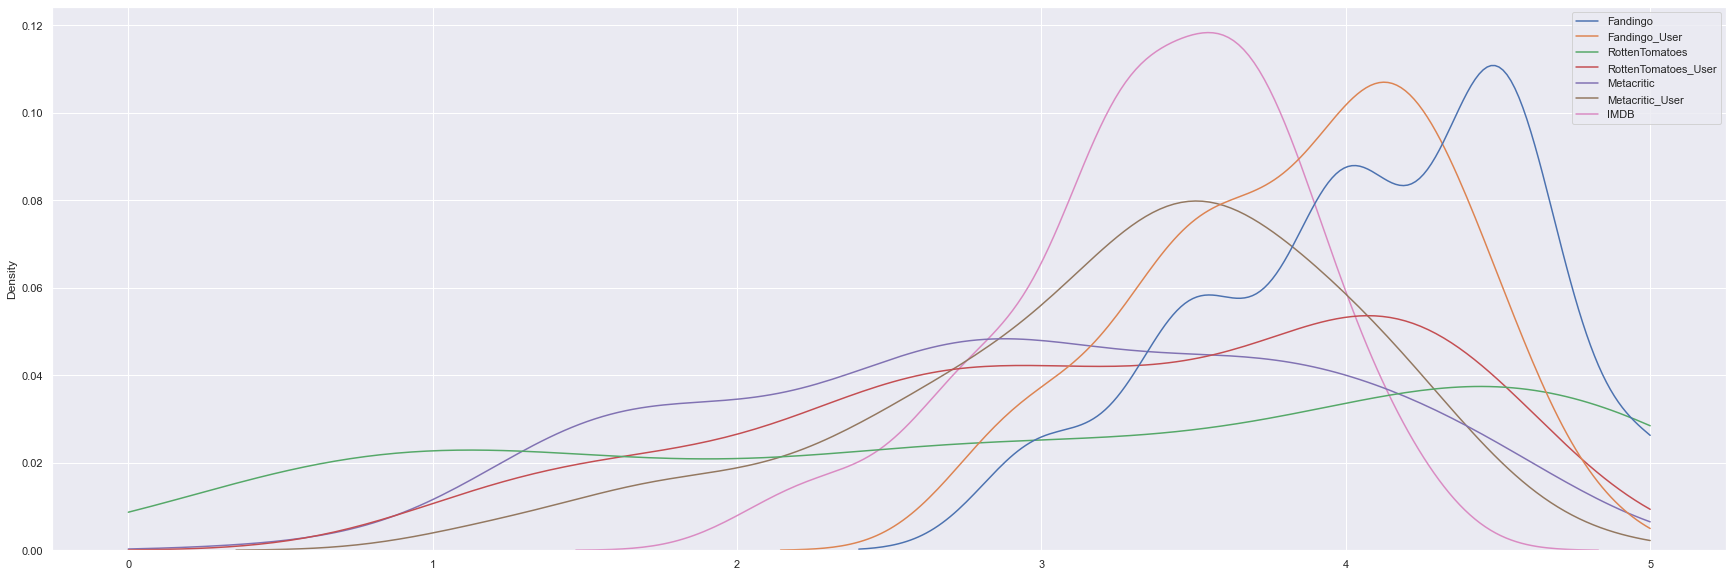

In [256]:
plt.figure(figsize = (30, 10))
sns.kdeplot(data = scores, clip = [0,5]);

In [262]:
worst = scores.nsmallest(15, 'IMDB')
worst['mean'] = np.round(worst.mean(axis = 1), 2)
worst.sort_values('mean')

,Fandingo,Fandingo_User,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,mean
FILM,,,,,,,,
Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0,1.67
Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2,1.86
The Vatican Tapes (2015),3.0,2.9,0.6,1.0,1.8,2.7,2.3,2.04
Hot Tub Time Machine 2 (2015),3.5,3.0,0.7,1.4,1.4,1.7,2.6,2.04
The Lazarus Effect (2015),3.0,3.0,0.7,1.2,1.6,2.4,2.6,2.07
The Woman In Black 2 Angel of Death (2015),3.0,3.0,1.1,1.2,2.1,2.2,2.4,2.14
Serena (2015),3.0,3.0,0.9,1.2,1.8,2.6,2.7,2.17
The Gallows (2015),3.0,2.9,0.8,1.4,1.5,3.5,2.2,2.19
Poltergeist (2015),3.0,2.8,1.6,1.2,2.4,1.8,2.5,2.19


In [281]:
worst['mean2'] = (worst['RottenTomatoes'] + worst['RottenTomatoes_User'] + worst['Metacritic'] + worst['Metacritic_User'] + worst['IMDB']) / 5

In [284]:
worst_vs_fand = worst[['Fandingo', 'Fandingo_User', 'mean2']]
worst_vs_fand

,Fandingo,Fandingo_User,mean2
FILM,,,
Fantastic Four (2015),3.0,2.7,1.20
Fifty Shades of Grey (2015),4.0,3.9,1.86
Paul Blart: Mall Cop 2 (2015),3.5,3.5,1.20
The Gallows (2015),3.0,2.9,1.88
The Boy Next Door (2015),4.0,3.6,1.78
The Vatican Tapes (2015),3.0,2.9,1.68
Hot Pursuit (2015),4.0,3.7,1.60
The Woman In Black 2 Angel of Death (2015),3.0,3.0,1.80
Poltergeist (2015),3.0,2.8,1.90


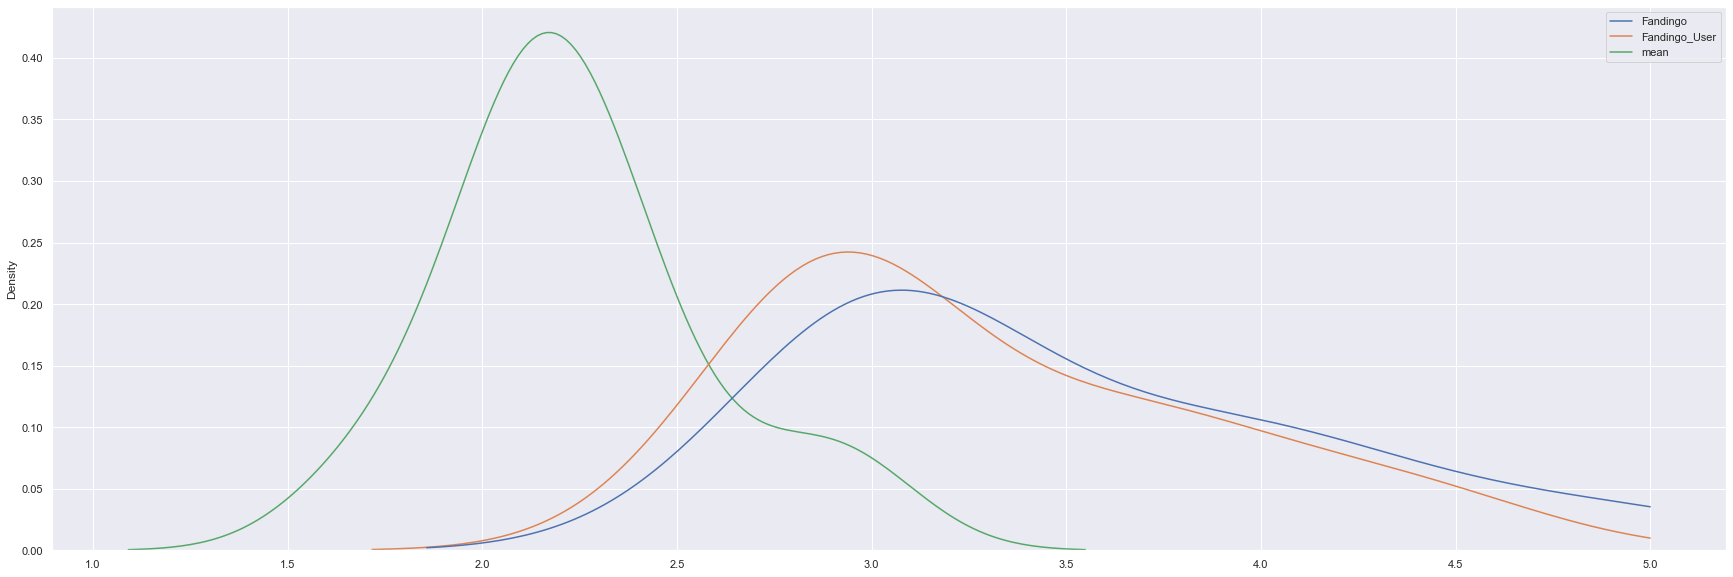

In [280]:
plt.figure(figsize = (30, 10))
sns.kdeplot(data = worst[['Fandingo', 'Fandingo_User', 'mean']], clip = [0,5]);